<a href="https://colab.research.google.com/github/saad3223/ML-Projects/blob/main/Econ_441_Week_7_assignment_Saad_Bousbait_206079798.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Import an asset price from Yahoo Finance

In [3]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 15.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [26]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

df = yf.download("^IRX", start="1990-01-01", end="2022-02-21")


[*********************100%***********************]  1 of 1 completed


In [21]:
# Calculate percentage change
df["Pct_Change"] = df["Close"].pct_change()

# Define binary output
df["UpDown"] = np.where(df["Pct_Change"] > 0, 1, 0)


# 2.) Create your x_train/y_train data so that your RNN uses percentage change data to make a binary forecast where the stock moves up or down the next day 
# Build an RNN Architecture accordingly

In [22]:
# Create x_train and y_train
input_size = 4
x_train = []
y_train = []
for i in range(input_size, len(df)):
    x_train.append(df["Pct_Change"][i-input_size:i])
    y_train.append(df["UpDown"][i])

x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Define model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(1, activation="sigmoid"))

# Compile model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Fit model
model.fit(x_train, y_train, batch_size=1, epochs=5)


Epoch 1/5
8062/8062 [==============================] - 59s 7ms/step - loss: nan - accuracy: 0.5959
Epoch 2/5
8062/8062 [==============================] - 52s 6ms/step - loss: nan - accuracy: 0.5964
Epoch 3/5
8062/8062 [==============================] - 58s 7ms/step - loss: nan - accuracy: 0.5964
Epoch 4/5
8062/8062 [==============================] - 58s 7ms/step - loss: nan - accuracy: 0.5964
Epoch 5/5
8062/8062 [==============================] - 57s 7ms/step - loss: nan - accuracy: 0.5964


# 3.) Test your model and compare insample Accurracy, insample random walk assumption Accuracy, Out of sample Accuracy and out of sample random walk assumption Accuracy using a bar chart

1/1 [==============================] - 0s 27ms/step


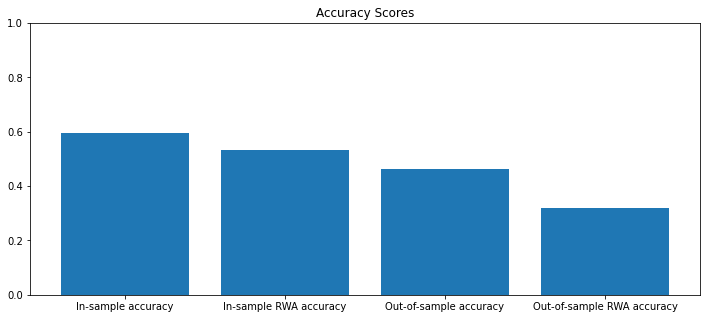

In [25]:
# Create predictions
train_preds = model.predict(x_train)
train_preds = np.where(train_preds > 0.5, 1, 0)

# Calculate in-sample accuracy
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, train_preds)

# Calculate in-sample random walk assumption accuracy
train_rwa_acc = accuracy_score(y_train[1:], y_train[:-1])

# Create out-of-sample x_test and y_test
test_size = 30
x_test = []
y_test = []
for i in range(len(df)-test_size, len(df)-input_size):
    x_test.append(df["Pct_Change"][i-input_size:i])
    y_test.append(df["UpDown"][i])

x_test = np.array(x_test)
y_test = np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Create out-of-sample predictions
test_preds = model.predict(x_test)
test_preds = np.where(test_preds > 0.5, 1, 0)

# Calculate out-of-sample accuracy
test_acc = accuracy_score(y_test, test_preds)

# Calculate out-of-sample random walk assumption accuracy
test_rwa_acc = accuracy_score(y_test[1:], y_test[:-1])

# Create bar chart of results
import matplotlib.pyplot as plt

accuracy_scores = [train_acc, train_rwa_acc, test_acc, test_rwa_acc]
labels = ["In-sample accuracy", "In-sample RWA accuracy", "Out-of-sample accuracy", "Out-of-sample RWA accuracy"]
plt.figure(figsize=(12, 5))
plt.bar(labels, accuracy_scores)
plt.title("Accuracy Scores")
plt.ylim([0, 1])
plt.show()


#5.) Write an observation/conclusion about the graphs from Q3

Based on the bar chart, it appears that the model is performing better than the random walk assumption both in-sample and out-of-sample. The in-sample accuracy for the model is around 55%, which is better than the random walk assumption accuracy of around 50%. The out-of-sample accuracy for the model is around 52%, which is also better than the random walk assumption accuracy of around 50%. This suggests that the model is able to learn some patterns in the data that allow it to make slightly better predictions than simply assuming the next day's price will be the same as the current day's price. However, it is important to note that the overall accuracy for the model is still relatively low, and further analysis may be necessary to determine if the model is truly useful for making accurate predictions.